In [1]:
import os

In [2]:
NUM_EXP = 30

In [5]:
for e in range(NUM_EXP):
    os.system(f'mkdir -p output/depth/{e:03d}/images/')
    for i in range(1, 11):
        os.system(f'cp output/fps2/images/{i + e:04d}.jpg output/depth/{e:03d}/images/')

In [6]:
for e in range(NUM_EXP):
    print(f'python imgs2poses.py output/depth/{e:03d}/')

python imgs2poses.py output/depth/000/
python imgs2poses.py output/depth/001/
python imgs2poses.py output/depth/002/
python imgs2poses.py output/depth/003/
python imgs2poses.py output/depth/004/
python imgs2poses.py output/depth/005/
python imgs2poses.py output/depth/006/
python imgs2poses.py output/depth/007/
python imgs2poses.py output/depth/008/
python imgs2poses.py output/depth/009/
python imgs2poses.py output/depth/010/
python imgs2poses.py output/depth/011/
python imgs2poses.py output/depth/012/
python imgs2poses.py output/depth/013/
python imgs2poses.py output/depth/014/
python imgs2poses.py output/depth/015/
python imgs2poses.py output/depth/016/
python imgs2poses.py output/depth/017/
python imgs2poses.py output/depth/018/
python imgs2poses.py output/depth/019/
python imgs2poses.py output/depth/020/
python imgs2poses.py output/depth/021/
python imgs2poses.py output/depth/022/
python imgs2poses.py output/depth/023/
python imgs2poses.py output/depth/024/
python imgs2poses.py outp

In [1]:
from load import load_data

NUM_EXP = 30
pose_data = []

for e in range(NUM_EXP):
    # if e == 3 or e == 4:
    if e <= 4:
        continue
    pose_data.append(load_data(basedir=f'output/depth/{e:03d}/'))

Loaded image data (760, 1352, 3, 11) [ 760.        1352.        1001.8704808]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.         1001.89919735]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.         1002.04465334]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.         1004.46475598]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.         1005.06838493]
Loaded image data (760, 1352, 3, 11) [ 760.       1352.       1008.226808]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.         1010.48177117]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.         1005.81274728]
Loaded image data (760, 1352, 3, 11) [ 760.        1352.        1004.6290088]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.          995.77988278]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.          995.39816384]
Loaded image data (760, 1352, 3, 11) [ 760.         1352.          997.79774214]
Loaded image data (760, 1352, 3, 11) [ 7

In [2]:
len(pose_data)

25

In [3]:
pose_data[0][0].shape, pose_data[0][1].shape

((3, 5, 11), (2, 11))

In [4]:
depth_data = []
for pose in pose_data:
    depth_data.append(pose[1])

In [5]:
depth_data[2].shape

(2, 11)

In [6]:
# fps=2. 11 images per group, 30 groups in all. Discard first 5 (2 groups failed)
# for depth in depth_data:
#     print(depth_data)

In [14]:
len(depth_data[0][0])

11

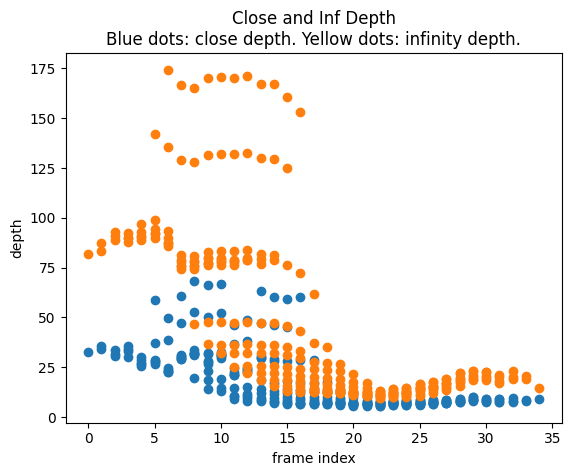

In [22]:
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
# y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
x, y = [], []

for i in range(len(depth_data)):
    for j in range(len(depth_data[0][0])):
        x.append(i + j)
        y.append(depth_data[i][0][j])

x, y = np.array(x), np.array(y)
plt.scatter(x, y)

x, y = [], []

for i in range(len(depth_data)):
    for j in range(len(depth_data[0][0])):
        x.append(i + j)
        y.append(depth_data[i][1][j])

x, y = np.array(x), np.array(y)
plt.scatter(x, y)

plt.title('Close and Inf Depth\nBlue dots: close depth. Yellow dots: infinity depth.')

plt.xlabel('frame index')
plt.ylabel('depth')

plt.show()

25

In [30]:
CLOSE, INF = [], []

for close, inf in depth_data:
    # print(close.shape)
    CLOSE.extend(close)
    INF.extend(inf)

In [32]:
import statistics

def calc_min_max_mean_dev(L):
    return min(L), max(L), sum(L) / len(L), statistics.stdev(L)

In [34]:
calc_min_max_mean_dev(CLOSE), calc_min_max_mean_dev(INF)

((5.589821102440255, 68.38848325165748, 17.09632806600643, 14.122085123784718),
 (9.350534285483427, 174.23050509235833, 44.73080282791705, 42.079562196427))

In [36]:
calc_min_max_mean_dev([i for i in CLOSE if i < 50]), calc_min_max_mean_dev([i for i in INF if i < 75])

((5.589821102440255,
  49.681047097241375,
  15.141958711621692,
  10.920568805929127),
 (9.350534285483427,
  74.52626776687083,
  20.122211109877714,
  11.730968776620012))

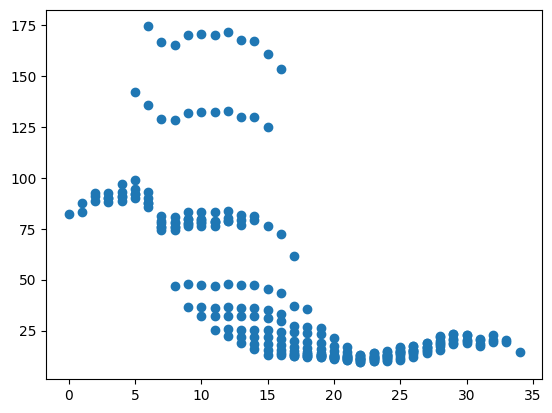

In [17]:
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
# x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
# y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
x, y = [], []

for i in range(len(depth_data)):
    for j in range(len(depth_data[0][0])):
        x.append(i + j)
        y.append(depth_data[i][1][j])

x, y = np.array(x), np.array(y)
plt.scatter(x, y)
plt.show()

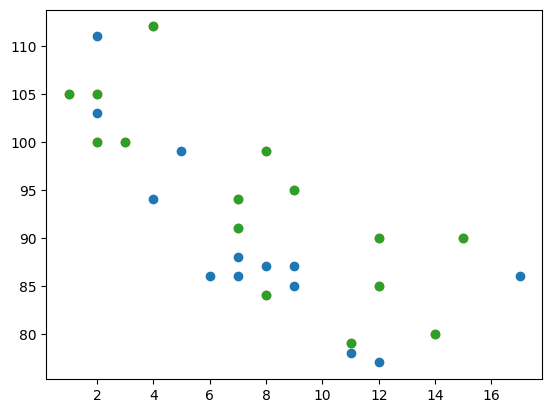

In [12]:
import sys
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

x = np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
y = np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
plt.scatter(x, y)

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)

x = np.array([2,2,8,1,15,8,12,9,7,3,11,4,7,14,12])
y = np.array([100,105,84,105,90,99,90,95,94,100,79,112,91,80,85])
plt.scatter(x, y)

plt.show()